In [ ]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     |████████████████████████████████| 19.4 MB 6.2 MB/s 
     |████████████████████████████████| 448 kB 40.8 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unab

In [ ]:
import re
from datetime import datetime
import collections

import requests, json
from bs4 import BeautifulSoup
import urllib.parse as parse

from tqdm import tqdm
import pickle

import numpy as np
import pandas as pd
import sklearn as sk

from konlpy.tag import Okt # komoran, hannanum, kkma, mecab
import gensim
from gensim.summarization import summarize

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud

# 브라우저에서 바로 그려지도록 
# %matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumSquareRound') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Seaborn 테마 설정
sns.set_theme(style="ticks", color_codes=True, font='NanumSquareRound', font_scale=2)

# 워닝 메세지 삭제
import warnings
warnings.filterwarnings(action='ignore')

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [ ]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
# 피클 사용법
# list = ['a', 'b', 'c']
# with open('list.txt', 'wb') as f:
#   pickle.dump(list, f)

# with open('list.txt', 'rb') as f:
#   data = pickle.load(f)

In [ ]:
df = pd.read_csv('러시아 한국 경제_v2_2022041520220224.csv')

In [ ]:
def clean_content(content):
  stripped = content[69:-2]
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=stripped)
  return cleaned

def clean_title(title):
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=title)
  return cleaned

In [ ]:
df['내용'] = df['내용'].apply(clean_content)

In [ ]:
df['제목'] = df['제목'].apply(clean_title) + '.'

In [ ]:
df['제목내용'] = df['제목'] + ' ' + df['내용']

In [ ]:
df['제목내용'][0]

' 오늘 점심 칼국수 어때   이런말 못하겠네 서울서 8000원 첫 돌파. 우크라 사태로 밀 가격 고공행진밀 선물가격 1년 전  75.8% 칼국수  매경DB  서울에서 대표적 서민음식인 칼국수 평균 가격이 8000원 선을 처음으로 넘어섰다.  러시아의 우크라이나 침공 사태와 해상운임 상승 등이 겹치면서 밀 가격이 급등한 탓이다.14일 한국농촌경제연구원의 해외곡물시장정보에 따르면 지난 12일 기준 시카고선물거래소의 밀 선물 가격은 t당 405.55달러로 1년 전 230.75달러  대비 75.8% 급등했다. 지난달 7일에는 475.46달러까지 치솟아 1년 전 대비 거의 두 배를 기록했다.러시아와 우크라이나는 세계 밀 수출량의 약 29%를 차지하고 있다. 러시아는 세계 최대 밀 수출국이며  우크라이나는  유럽의 빵 바구니 로도 불린다.밀 가격 급등으로 밀가루를 사용하는 외식 물가의 부담도 커지고 있다. 한국소비자원 가격정보 종합포털  참가격 을 보면 지난달 서울 지역의 칼국수 평균 가격은 1년 전보다 8.7% 올라 8113원이다. 서울 지역 칼국수 가격이 8000원을 넘은 것은 이번이 처음이다. 지난달에는 7962원으로 8000원에 육박했다. 자료   한국소비자원 참가격  밀가루를 사용하는 냉면이나 자장면도 다른 외식 품목보다 많이 올랐다. 지난달 서울 지역 냉면 가격은 9962원으로 지난해 같은 달보다 9.7% 올랐고  자장면은 5846원으로 9.4% 상승했다. 같은 기간 비빔밥 7.0% 은 물론  김치찌개백반 5.7%   김밥 5.2%   삼겹살 3.5% . 삼계탕 0.3%  등 안오른 품목이 없지만  칼국수나 냉면에 비해서는 상대적으로 낮은 상승률을 보였다.서울 지역 냉면 가격은 곧 1만원 선을 넘을 것으로 보인다. 이미 유명 평양냉면집들의 냉면 한 그릇은 1만1000 1만5000원에 판매되고 있다.한국농촌경제연구원은  우크라이나 사태에 따른 곡물 국제가격 상승으로 단기적 대체 원산지 개발과 국내 물가 영향 최소화를 위한 금융 및 세제 지원을 강화해야 한다 면

In [ ]:
# 텍스트랭크 코드

from gensim.summarization import summarize

for idx in range(len(df['제목내용'])):
  try:
    df['제목내용'].iloc[idx] = summarize(df['제목내용'].iloc[idx], ratio=0.5)
  except Exception as e:
    print(idx)
    print(e)

336
input must have more than one sentence
599
input must have more than one sentence
890
input must have more than one sentence
945
input must have more than one sentence
1042
input must have more than one sentence
1095
input must have more than one sentence
1190
input must have more than one sentence
1236
input must have more than one sentence
1291
input must have more than one sentence
1342
input must have more than one sentence
1403
input must have more than one sentence


In [ ]:
df['제목내용'][0]

'러시아의 우크라이나 침공 사태와 해상운임 상승 등이 겹치면서 밀 가격이 급등한 탓이다.14일 한국농촌경제연구원의 해외곡물시장정보에 따르면 지난 12일 기준 시카고선물거래소의 밀 선물 가격은 t당 405.55달러로 1년 전 230.75달러  대비 75.8% 급등했다.\n러시아는 세계 최대 밀 수출국이며  우크라이나는  유럽의 빵 바구니 로도 불린다.밀 가격 급등으로 밀가루를 사용하는 외식 물가의 부담도 커지고 있다.\n한국소비자원 가격정보 종합포털  참가격 을 보면 지난달 서울 지역의 칼국수 평균 가격은 1년 전보다 8.7% 올라 8113원이다.\n서울 지역 칼국수 가격이 8000원을 넘은 것은 이번이 처음이다.\n자료   한국소비자원 참가격  밀가루를 사용하는 냉면이나 자장면도 다른 외식 품목보다 많이 올랐다.\n지난달 서울 지역 냉면 가격은 9962원으로 지난해 같은 달보다 9.7% 올랐고  자장면은 5846원으로 9.4% 상승했다.'

In [ ]:
okt = Okt()

doc_tokenized = df['제목내용'].apply(okt.morphs, stem= True)

# print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

In [ ]:
def oneWordRemoval(lst):
  for el in lst:
    if len(el) <= 1:
      lst.remove(el)

doc_tokenized.apply(oneWordRemoval)

0       None
1       None
2       None
3       None
4       None
        ... 
1451    None
1452    None
1453    None
1454    None
1455    None
Name: 제목내용, Length: 1456, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_tokenized)
# print(dictionary.token2id)
# print('dictionary size : %d' % len(dictionary))

In [ ]:
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

In [ ]:
# for doc in BoW_corpus:
#   #  print([[dictionary[id], freq] for id, freq in doc])
#    print([[id, freq] for id, freq in doc])

In [ ]:
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')

In [ ]:
# for doc in tfidf[BoW_corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

In [ ]:
with open('tfidf.txt', 'wb') as f:
  pickle.dump(tfidf, f)

In [ ]:
num = 0
for doc in tfidf[BoW_corpus]:
  for id, freq in doc:
    num += 1
print(num)

289148


In [ ]:
tfidf_dic = {dictionary.get(id): freq for doc in tfidf[BoW_corpus] for id, freq in doc}

In [ ]:
toDataFrame = {
  '단어': tfidf_dic.keys(),
  '빈도': tfidf_dic.values(),    
}

pd.DataFrame(toDataFrame)

,단어,빈도
0,\n,0.016496
1,12일,0.047973
2,14일,0.067932
3,1년,0.020855
4,230.75달러,0.072563
...,...,...
20858,Review,0.103863
20859,View,0.103863
20860,곽병열,0.103863
20861,넷,0.103863


In [ ]:
len(tfidf_dic)

20863

In [ ]:
# with open('tfidf_dic.txt', 'rb') as f:
#   tfidf_dic = pickle.load(f)

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000, font_path = font_path).fit_words(tfidf_dic)

In [ ]:
tfidf_dic['누에'], tfidf_dic['도넛']

(0.715504769744311, 0.6810770900574694)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드_1000.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
w_500 = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=500, font_path = font_path).fit_words(tfidf_dic)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w_500)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드_500.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
w_100 = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=100, font_path = font_path).fit_words(tfidf_dic)

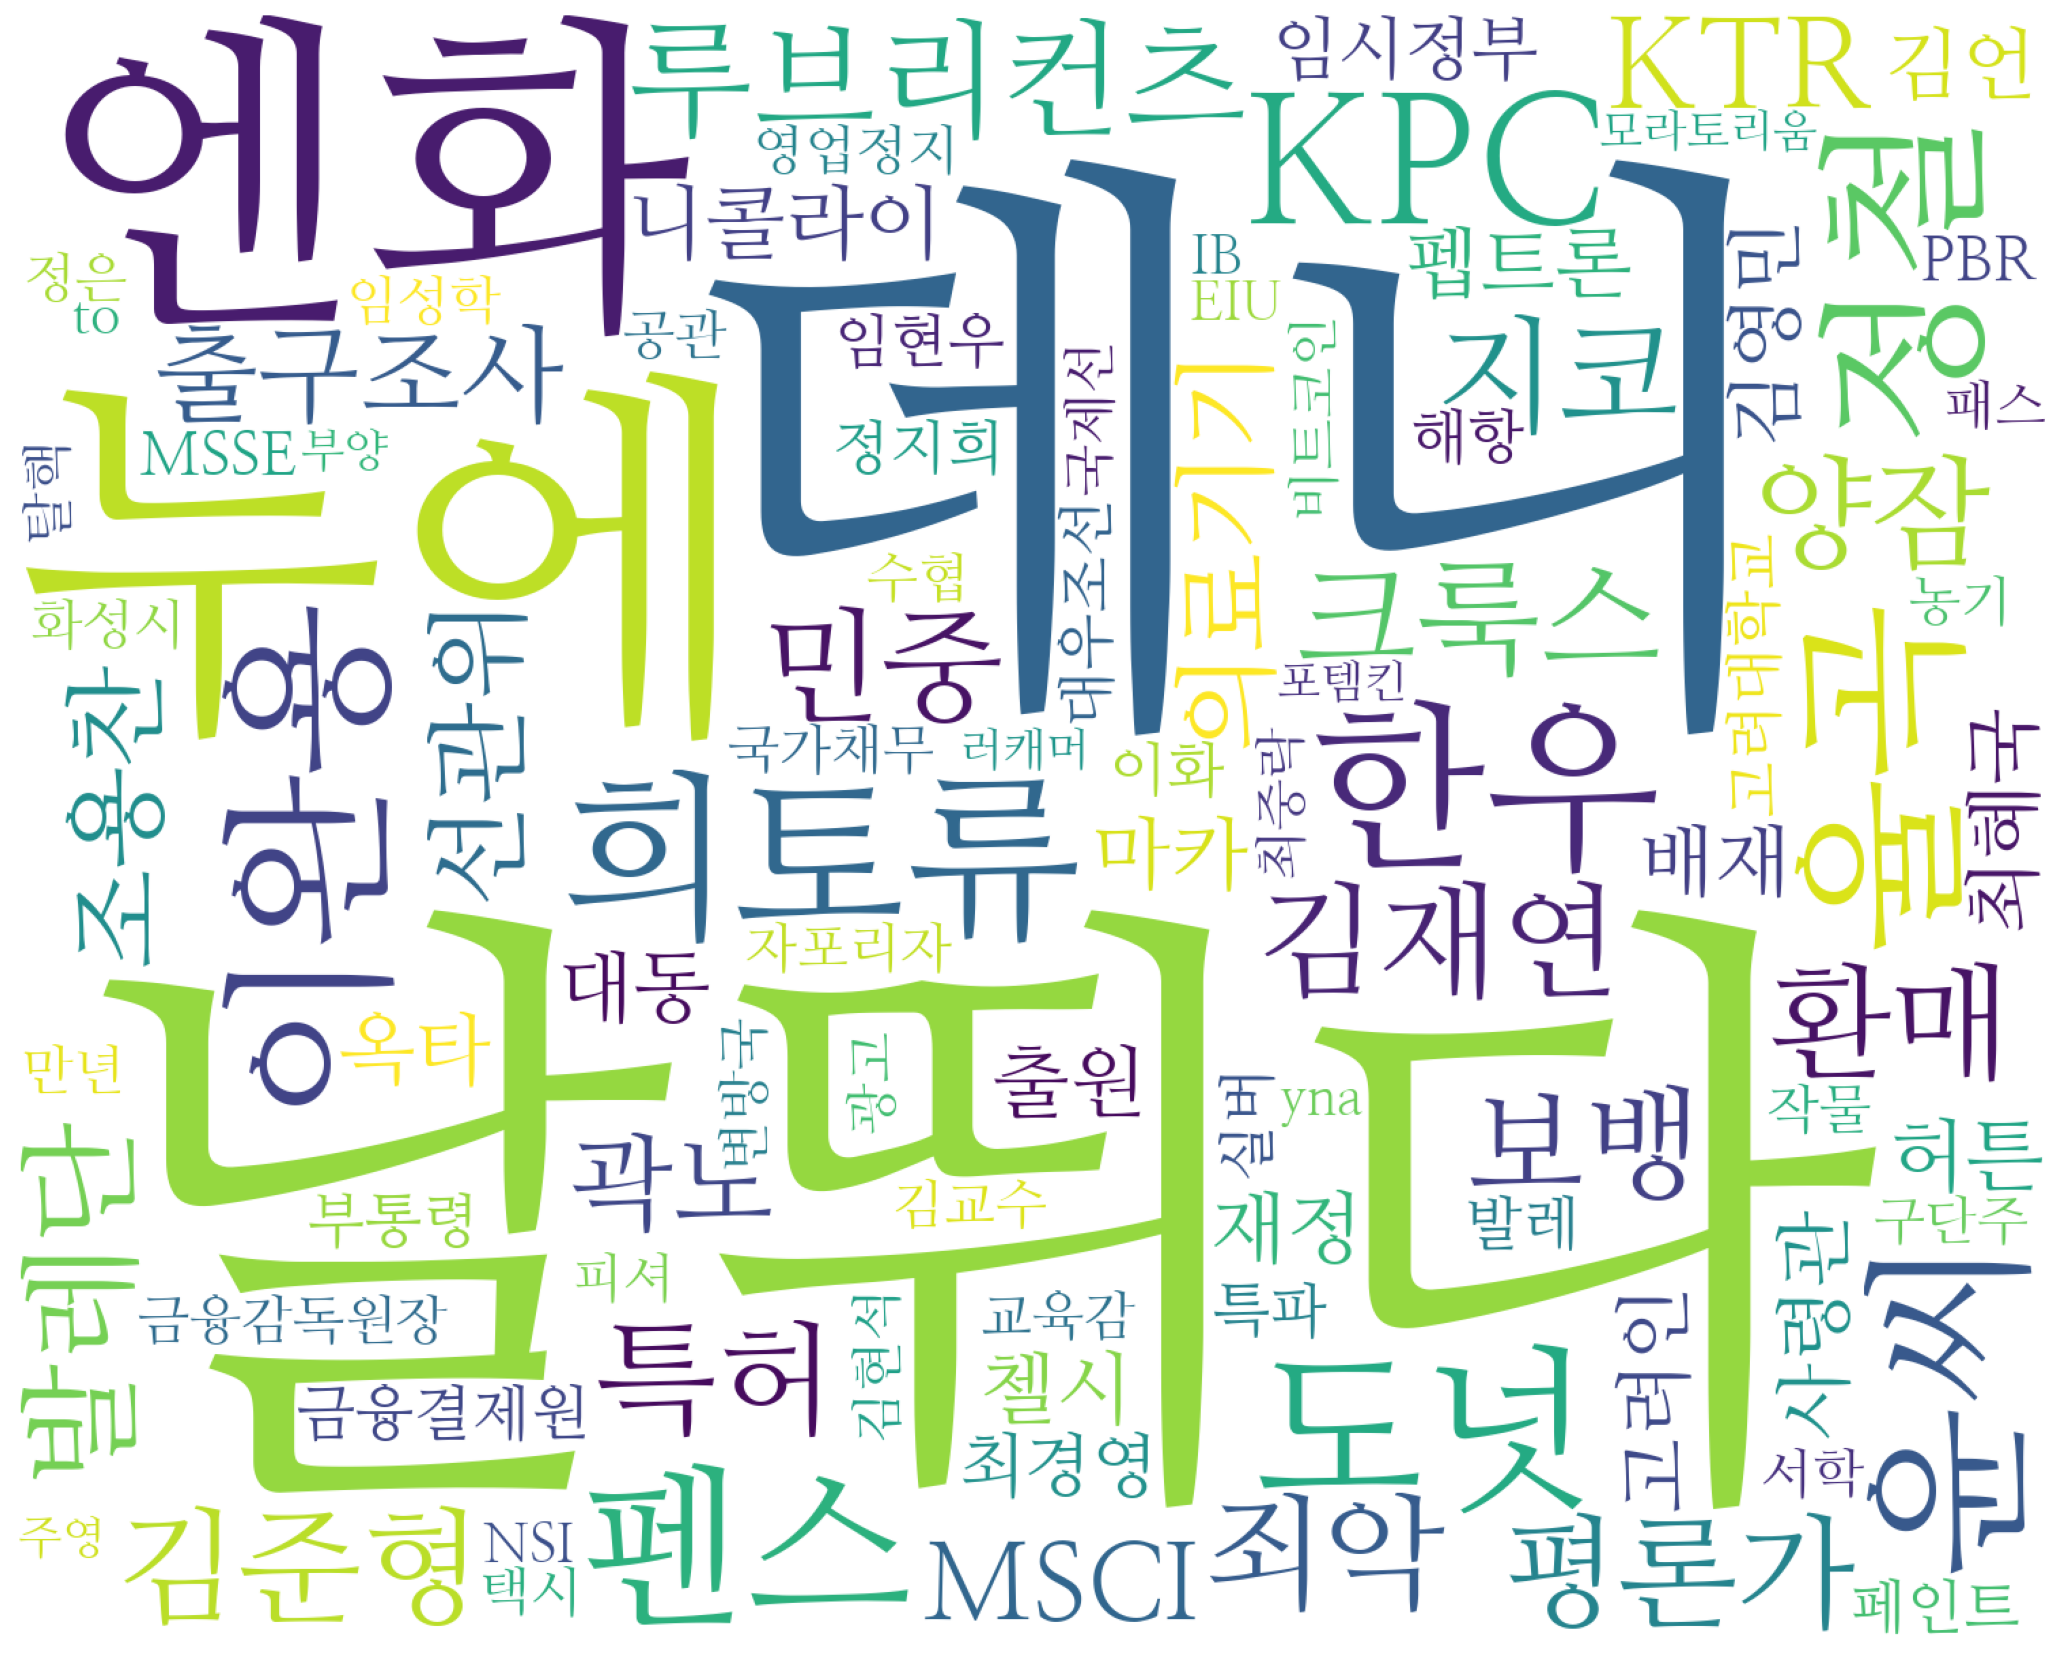

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w_100)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드_100.png')

In [ ]:
od = {v: k for k, v in tfidf_dic.items()}

In [ ]:
ordered_keys = sorted(od.keys())

In [ ]:
tfidf_od = {od[k]: k for k in ordered_keys}

In [ ]:
keys = list(tfidf_od.keys())
keys.reverse()
for i in range(50):
  key = keys[i]
  print(key, tfidf_od[key])

날뛰다 0.8368933163962416
데니 0.7737841724275194
누에 0.715504769744311
엔화 0.712348156180698
희토류 0.7099576324803025
한우 0.7097903341946566
율곡 0.7000604016680094
이완용 0.6925489988523882
도넛 0.6810770900574694
KPC 0.6757538341644205
펜스 0.6605913458702581
윤씨 0.6591388278340756
정철 0.6556914774743928
루브리컨츠 0.6550502621135317
김준형 0.6433690496955378
죄악 0.6382412560437558
크룩스 0.6334818615482234
지코 0.631344307159357
김재연 0.624038487626036
환매 0.6227522591332467
발레단 0.6211165398283128
민중 0.6172766223075805
특허 0.6004242268797291
보뱅 0.5834626942073513
평론가 0.5822067960162045
양잠 0.5763788422940282
KTR 0.5759887909172251
출구조사 0.5735131785937041
MSCI 0.5723912667240516
의료기기 0.5700575520474638
조용찬 0.5697555921373829
곽노 0.5625525530841898
선관위 0.5617576820335176
니콜라이 0.5586857724881192
허튼 0.5420083014137052
마카 0.5356436709299842
펩트론 0.5259306251746545
출원 0.5213803277797804
첼시 0.5185427168704843
대동 0.5136523437141273
옥타 0.5082540909962538
재정 0.5079195707134562
사령관 0.5074406947193453
고려인 0.5019726758195858
최혜국 0.4943